# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**STELLA, NJUKI**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Libraries for data preparation and model building 

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [63]:
df = pd.read_csv("df_train.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [64]:
# look at data statistics
df.head(10)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
5,5,2015-01-01 18:00:00,1.000000,level_7,0.0,1.000000,69.666667,67.333333,12.333333,0.666667,...,274.639229,284.165625,277.919000,277.919000,284.165625,277.919000,282.077844,274.639229,274.639229,6842.000000
6,6,2015-01-01 21:00:00,1.000000,level_8,0.0,1.000000,83.666667,63.333333,16.333333,1.000000,...,268.287000,283.420333,274.295437,274.295437,283.420333,274.295437,277.637000,268.287000,268.287000,10760.333333
7,7,2015-01-02 00:00:00,1.000000,level_9,0.0,1.000000,83.666667,64.000000,8.666667,1.333333,...,266.882333,282.474000,272.903167,272.903167,282.474000,272.903167,276.457333,266.882333,266.882333,10866.000000
8,8,2015-01-02 03:00:00,1.000000,level_9,0.0,1.000000,86.000000,63.333333,5.333333,1.000000,...,266.226667,281.726667,271.780115,271.780115,281.726667,271.780115,276.151667,266.226667,266.226667,-1850.333333
9,9,2015-01-02 06:00:00,1.000000,level_9,0.0,1.333333,87.000000,63.666667,15.333333,1.000000,...,266.878000,281.803000,271.673667,271.673667,281.803000,271.673667,276.453000,266.878000,266.878000,-4002.333333


This data contains 49 columns 

In [65]:
df.shape

(8763, 49)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

This data contains 46 numerical features and 3 categorical features. 

Let us check if the data contains any null values using the following command:

In [67]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

we can see that Valencia_pressure contains 2068 null values.

A summary of the common descriptive statistics: 

In [68]:
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


Let us see if there are any outliers in the data

In [69]:
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

A kurtosis of >3 is high which indicates a large number of outliers whereas a low kurtosis <3 indicates a lack of outliers. Evidently some cities have a large number of outliers. This means that the energy suplied at different times of the day or on different days varies greatly for these cities. An example of a city with a high kurtosis is Valencia 

In [70]:
df.Valencia_snow_3h.describe()

count    8763.000000
mean        0.000205
std         0.011866
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.791667
Name: Valencia_snow_3h, dtype: float64

Asses the skewness of the data:

In [71]:
df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

# plot relevant feature interactions
Multivariate Data Analysis 

# evaluate correlation
Determine the correlation between the features.

In [72]:
df.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


Visualise the correlation using a heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

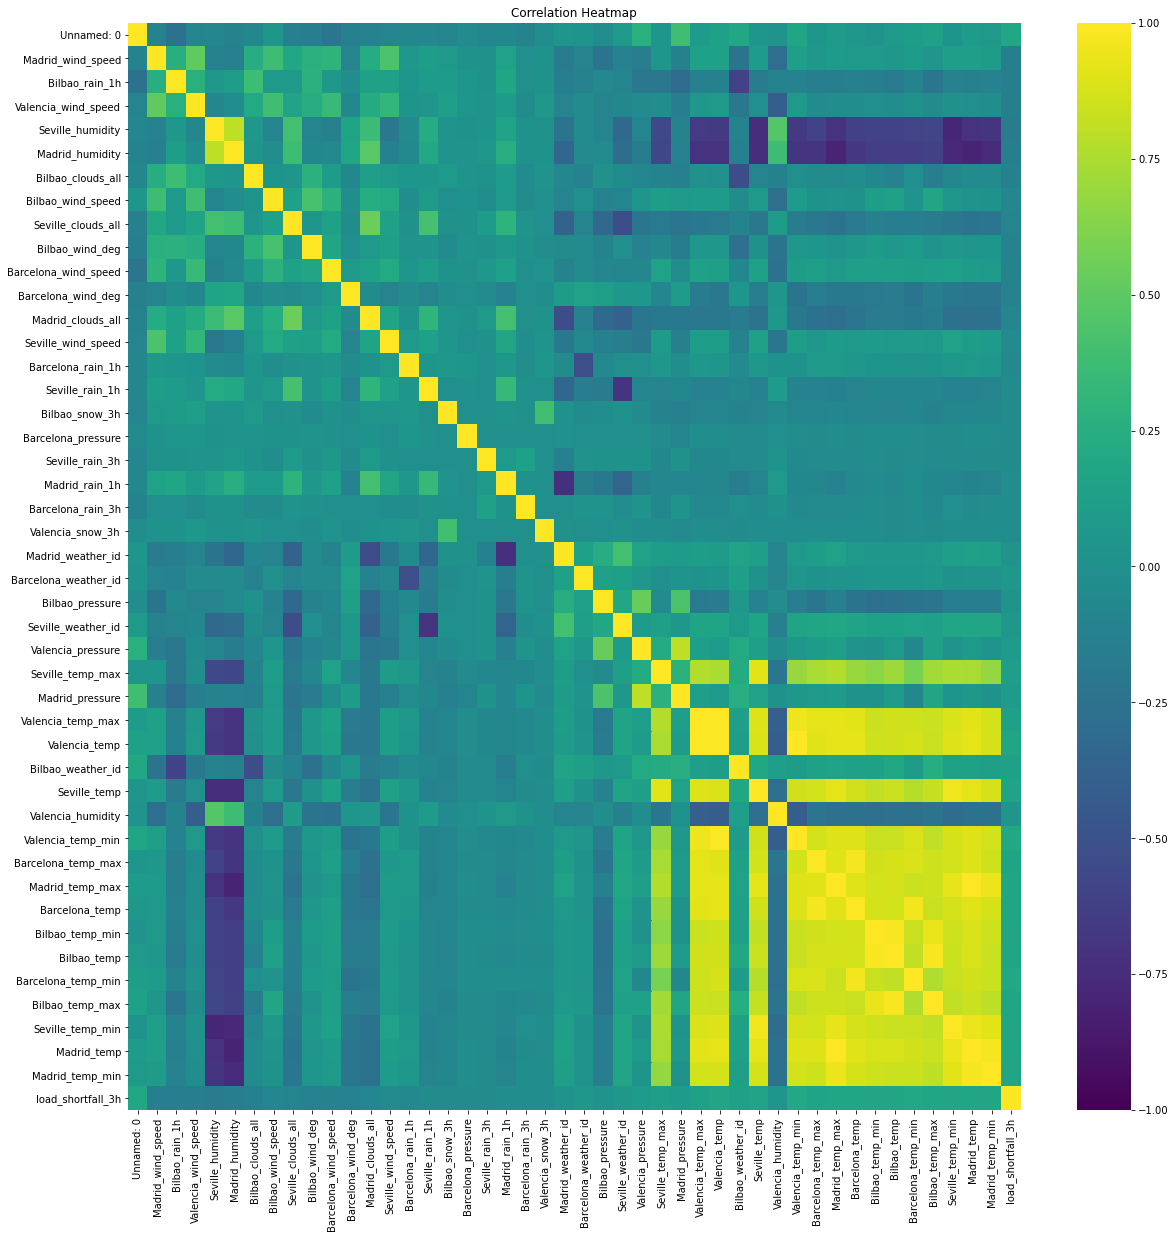

In [73]:
fig, ax = plt.subplots(figsize = (20,20))
heatmap = sns.heatmap(df.corr(),ax=ax, vmin=-1, vmax=1, annot=False, cmap="viridis")
heatmap.set_title("Correlation Heatmap", fontdict = {"fontsize":12})

pair plot 

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

drop the column (Valencia_pressure) with a lot of missing values (2068 missing values out of the total 8763 data points)

In [74]:
del df["Valencia_pressure"]

Confirm that the dataframe has one column less we use the shape method.

In [75]:
df.shape

(8763, 48)

Dummy variable encoding 

In [19]:
df_dummies = pd.get_dummies(df[['Valencia_wind_deg','Valencia_wind_deg','Seville_pressure']])
df_dummies.head()

,Valencia_wind_deg_level_1,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


From the pd.dummies dataframe we can see that we have generated 45 more columns which when added to the other columns will give us more than 90 columns! 

convert time column (object to datetime)

In [16]:
# create new features

In [76]:
df ['Valencia_wind_deg']

0        level_5
1       level_10
2        level_9
3        level_8
4        level_7
          ...   
8758     level_6
8759     level_6
8760     level_9
8761     level_8
8762     level_9
Name: Valencia_wind_deg, Length: 8763, dtype: object

In [77]:
df['Valencia_wind_deg_slice'] = df ['Valencia_wind_deg'].str.slice(6)

In [78]:
df['Valencia_wind_deg_slice']

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg_slice, Length: 8763, dtype: object

In [79]:
df['Valencia_wind_deg_slice']= df['Valencia_wind_deg_slice'].astype(float)

In [80]:
del df['Valencia_wind_deg']

In [81]:
df['Seville_pressure']

0       sp25
1       sp25
2       sp25
3       sp25
4       sp25
        ... 
8758    sp23
8759    sp23
8760    sp22
8761    sp23
8762    sp25
Name: Seville_pressure, Length: 8763, dtype: object

In [82]:
df['Seville_pressure_slice'] = df['Seville_pressure'].str.slice(2)

In [83]:
df['Seville_pressure_slice']

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure_slice, Length: 8763, dtype: object

In [84]:
df['Seville_pressure_slice'] = df['Seville_pressure_slice'].astype(float)

In [85]:
del df['Seville_pressure']

In [86]:
del df['Unnamed: 0']

In [28]:
df['datetime'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')

In [29]:
df['datetime']

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
8758   2017-12-31 09:00:00
8759   2017-12-31 12:00:00
8760   2017-12-31 15:00:00
8761   2017-12-31 18:00:00
8762   2017-12-31 21:00:00
Name: datetime, Length: 8763, dtype: datetime64[ns]

In [30]:
df['timestamp'] = df.datetime.values.astype(np.int64) // 10 ** 9

In [31]:
df['timestamp']

0       1420081200
1       1420092000
2       1420102800
3       1420113600
4       1420124400
           ...    
8758    1514710800
8759    1514721600
8760    1514732400
8761    1514743200
8762    1514754000
Name: timestamp, Length: 8763, dtype: int64

In [87]:
del df ['time']

In [33]:
del df['timestamp']

Reorder columns so that dependent variable is the last column in the dataframe 

In [88]:
column_titles = [col for col in df.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
df = df.reindex(columns = column_titles)

Correlation between the formated features 

In [89]:
df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Valencia_wind_deg_slice,Seville_pressure_slice,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,0.121835,-0.182792,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,0.199288,0.067471,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,0.292731,-0.065082,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,0.240007,0.217941,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,0.253549,0.294543,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,...,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,0.158266,-0.038859,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,...,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,0.075864,-0.115875,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,...,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,0.085519,-0.094748,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,...,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,0.157252,0.041985,-0.120800
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,0.177393,1.000000,...,0.123403,0.120361,0.109268,0.109692,0.130367,0.089365,0.084679,0.042795,-0.113567,-0.103633


correlation heatmap 

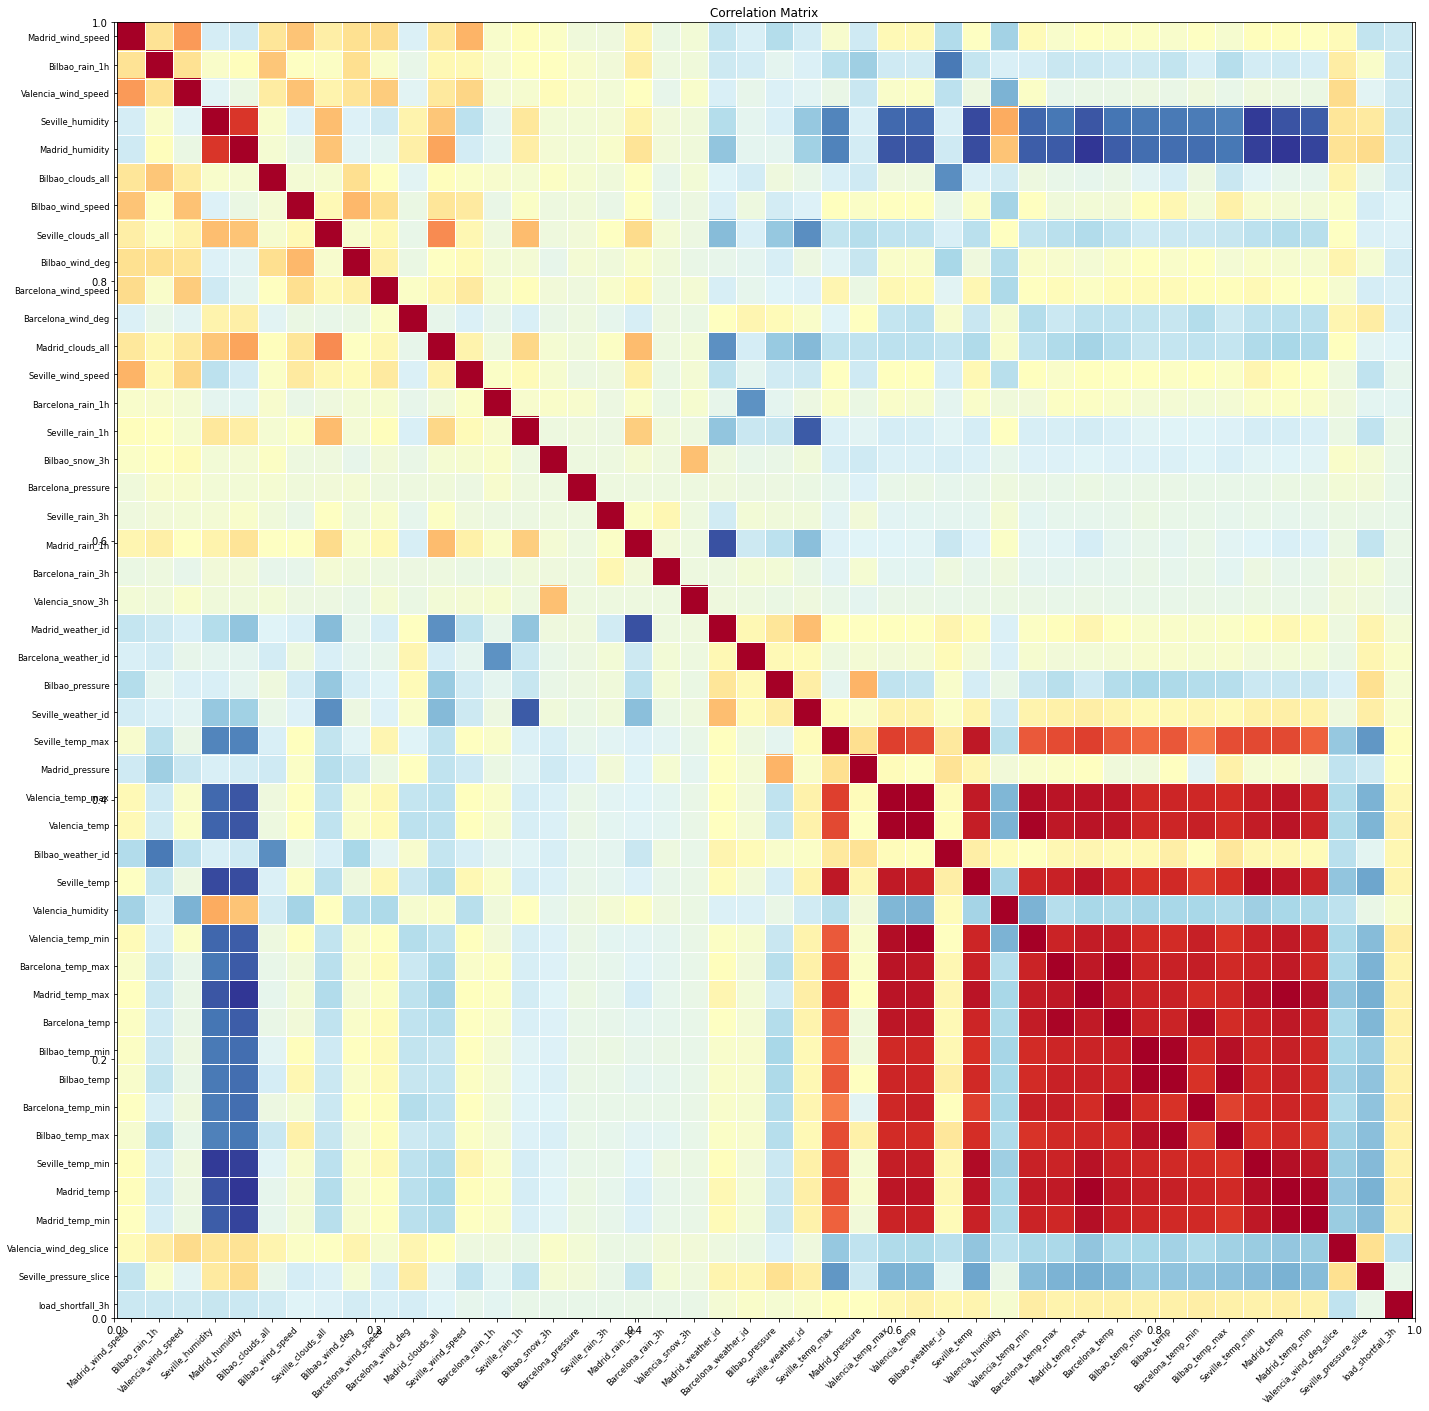

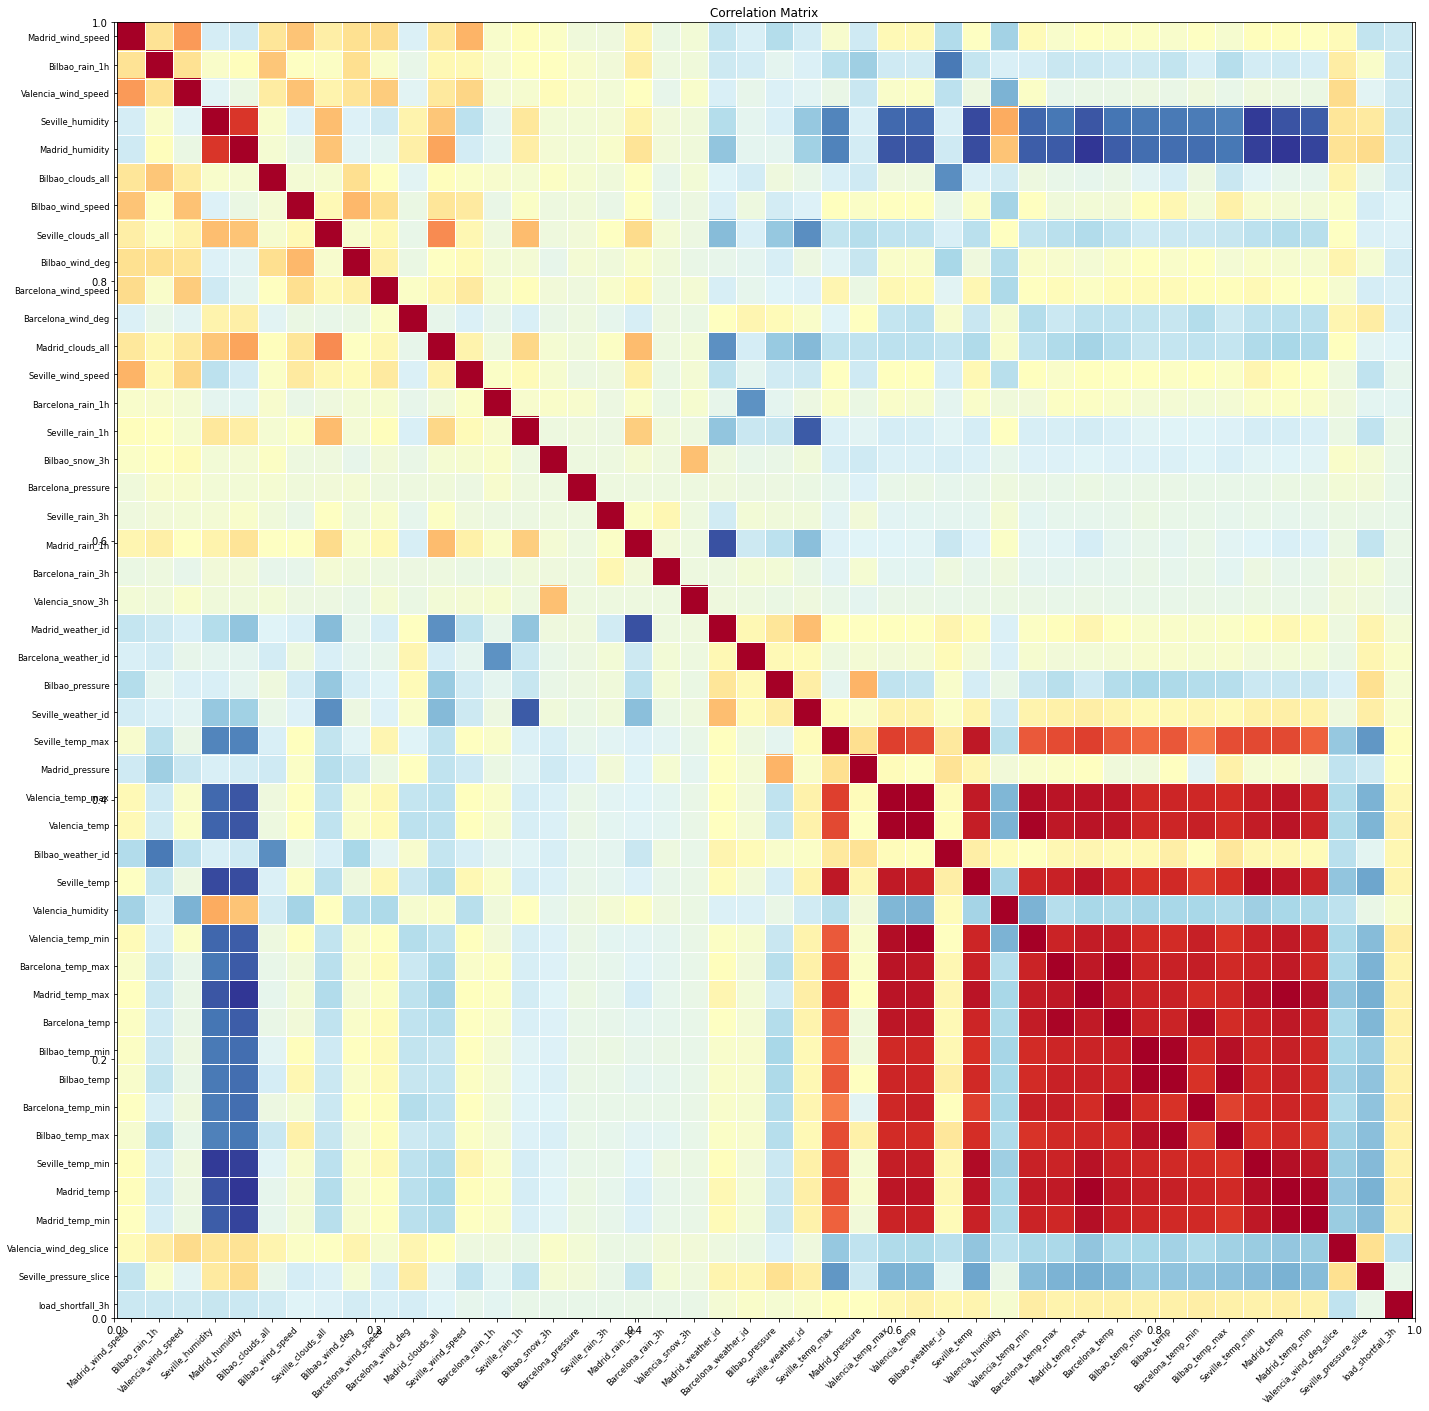

In [90]:
from statsmodels.graphics.correlation import plot_corr

fig, ax = plt.subplots(figsize=(20,20))
ax = fig.add_subplot(111)
plot_corr(df.corr(), xnames=df.corr().columns, ax=ax)

Text(0.5, 1.0, 'Correlation Heatmap')

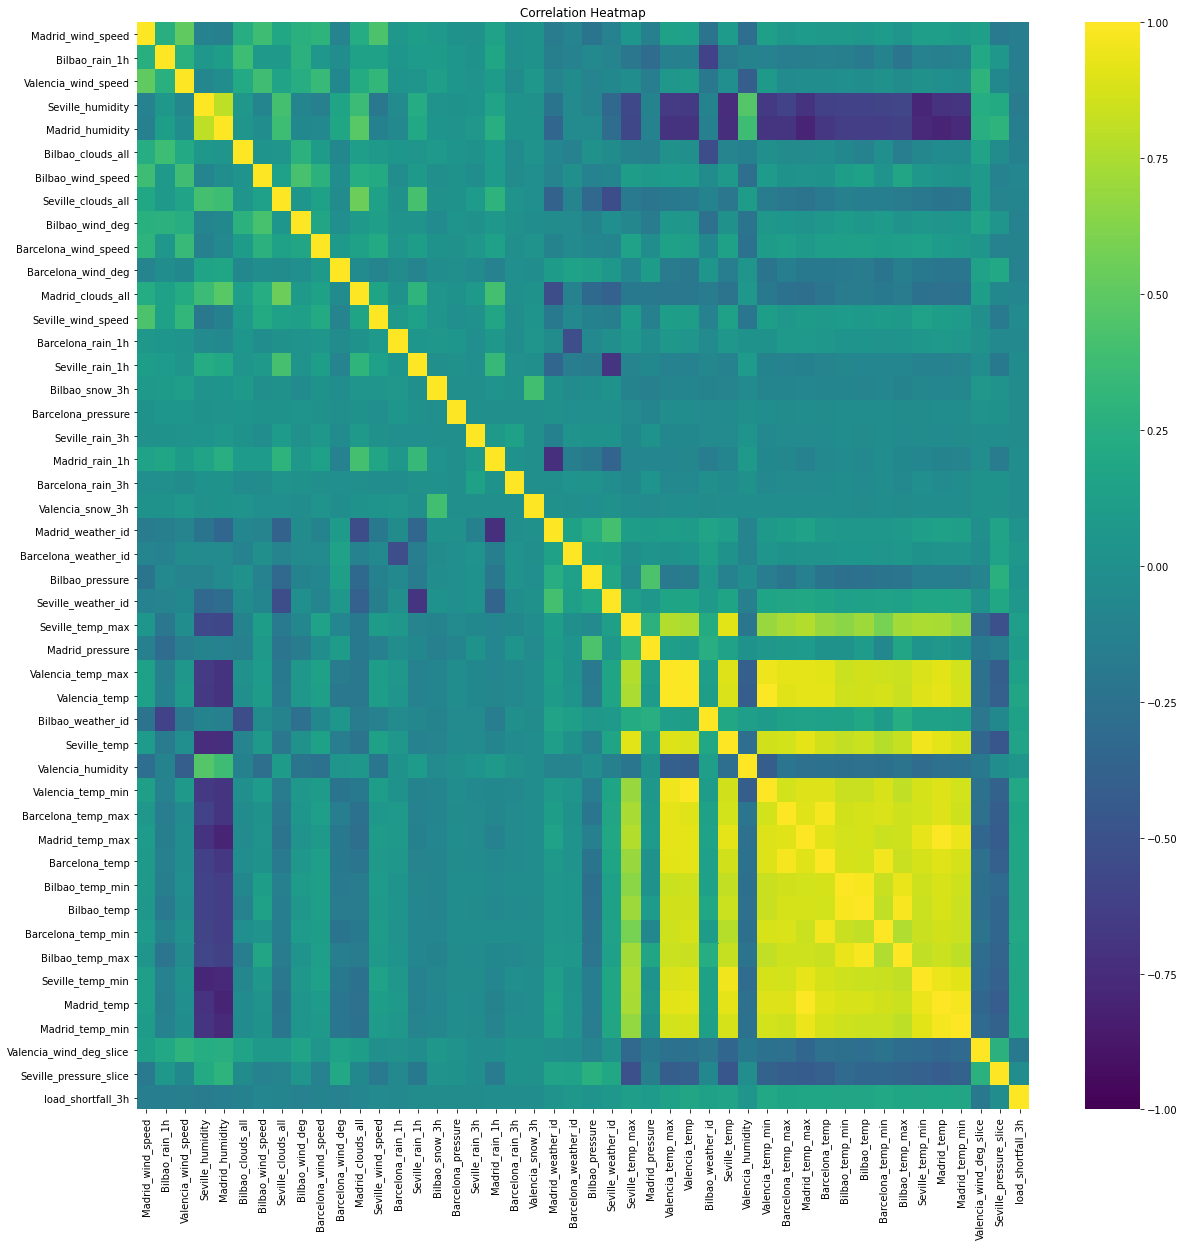

In [91]:
fig, ax = plt.subplots(figsize = (20,20))
heatmap = sns.heatmap(df.corr(),ax=ax, vmin=-1, vmax=1, annot=False, cmap="viridis")
heatmap.set_title("Correlation Heatmap", fontdict = {"fontsize":12})

A lot of features in are negatively correlated

Generating the regression string with statsmodel's ols

In [115]:
from statsmodels.formula.api import ols

#model dataframe with all columns 
dfm = df.copy()

#the dependent variable 
y_shortfall = 'load_shortfall_3h'

#the independent variables
x_names = [col for col in dfm.columns if col!= 'load_shortfall_3h']

#build OLS formula string
formula_str = y_shortfall + " ~ " + " + ".join(x_names)
print ("Formula:\n\t {}".format(formula_str))

Formula:
	 load_shortfall_3h ~ Madrid_wind_speed + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_speed + Barcelona_wind_deg + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_rain_1h + Bilbao_snow_3h + Barcelona_pressure + Seville_rain_3h + Madrid_rain_1h + Barcelona_rain_3h + Valencia_snow_3h + Madrid_weather_id + Barcelona_weather_id + Bilbao_pressure + Seville_weather_id + Seville_temp_max + Madrid_pressure + Valencia_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Valencia_temp_min + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Bilbao_temp_min + Bilbao_temp + Barcelona_temp_min + Bilbao_temp_max + Seville_temp_min + Madrid_temp + Madrid_temp_min + Valencia_wind_deg_slice + Seville_pressure_slice


In [93]:
#fit the model using the model dataframe
model = ols(formula = formula_str, data = dfm)
fitted = model.fit()

#output the printed summary
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     35.24
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          1.04e-276
Time:                        11:43:47   Log-Likelihood:                -86711.
No. Observations:                8763   AIC:                         1.735e+05
Df Residuals:                    8717   BIC:                         1.738e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2

VARIABLE SIGNIFICANCE AND CORRELATION

The OLS summary still indicates strong multicollinearity. We need to filter the features some more. Let us evaluate their significance.
Lets evaluate features that have the strongest correlations (both positive and negative)

In [94]:
#calculate the correlation between predictor variables and the response variable
corrs = df.corr()['load_shortfall_3h'].sort_values(ascending=False)

Using Pearson regression from SciPy:

In [95]:
from scipy.stats import pearsonr

#Build a dictionary of correlation coefficients and p-values
my_dict = {}

column_titles = [col for col in corrs.index if col!='load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(df[col], df['load_shortfall_3h'])[1],6)
    my_dict[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

#create a new dataframe to store the correlation coefficients and p-values for reference    
df_cp = pd.DataFrame(my_dict).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Valencia_temp_min,0.201863,0.000000
Bilbao_rain_1h,-0.152510,0.000000
Madrid_wind_speed,-0.150981,0.000000
Madrid_humidity,-0.150536,0.000000
Valencia_wind_speed,-0.142791,0.000000
Bilbao_clouds_all,-0.127293,0.000000
Bilbao_wind_deg,-0.120800,0.000000
Barcelona_wind_deg,-0.116133,0.000000
Barcelona_wind_speed,-0.103633,0.000000
Seville_clouds_all,-0.091804,0.000000


The smaller the p-value the stronger the evidence that we should reject the null hypothesis. Hence a p-value less than 5% (typically <= 0.05) is stastistically significant. we will only consider features which  have a p-value of <0.05
All the features are statistically significant. i.e their p-values are <0.05

Keep all the features in a dataframe x

In [96]:
#the dependent variable is still the same
y_shortfall= df['load_shortfall_3h']

#model building - independent variable (IV) DataFrame 
X_names = list (df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df[X_names]

Look for predictor variable pairs which have a high correlation with each other to avoid autocorrelation.

In [97]:
#create correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

,Valencia_temp_min,Barcelona_temp_min,Madrid_temp,Barcelona_temp,Madrid_temp_max,Bilbao_temp_max,Bilbao_temp,Madrid_temp_min,Seville_temp_min,Valencia_temp,...,Barcelona_wind_speed,Barcelona_wind_deg,Bilbao_wind_deg,Bilbao_clouds_all,Valencia_wind_speed,Madrid_humidity,Madrid_wind_speed,Bilbao_rain_1h,Seville_humidity,Valencia_wind_deg_slice
Valencia_temp_min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.985479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barcelona_temp_min,NaN,1.000000,NaN,0.964089,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madrid_temp,NaN,NaN,1.000000,0.903143,0.988871,NaN,NaN,0.973641,0.939079,0.915753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barcelona_temp,NaN,0.964089,0.903143,1.000000,0.900428,NaN,NaN,NaN,NaN,0.914601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madrid_temp_max,NaN,NaN,0.988871,0.900428,1.000000,NaN,NaN,0.939147,0.923481,0.917820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_temp_max,NaN,NaN,NaN,NaN,NaN,1.000000,0.981624,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_temp,NaN,NaN,NaN,NaN,NaN,0.981624,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madrid_temp_min,NaN,NaN,0.973641,NaN,0.939147,NaN,NaN,1.000000,0.907758,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seville_temp_min,NaN,NaN,0.939079,NaN,0.923481,NaN,NaN,0.907758,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valencia_temp,0.985479,NaN,0.915753,0.914601,0.917820,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Isolate the sections of the correlation matrix where the off-diagonal correlations are high.

In [98]:
#create correlation matrix again 
#find rows and columns where correlation coefficients >0.9 or <-0.9
corr = X_data.corr()
r,c = np.where(np.abs(corr) > 0.9) 

#the off diagonal entries
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,Valencia_temp,Valencia_temp_max,Barcelona_temp,Barcelona_temp,Madrid_temp_max,Madrid_temp_min,Seville_temp_min,Valencia_temp,Seville_temp,Valencia_temp_max,...,Madrid_temp_max,Seville_temp_min,Seville_temp_max,Valencia_temp_min,Madrid_temp,Barcelona_temp,Madrid_temp_max,Valencia_temp,Barcelona_temp_max,Seville_temp
Valencia_temp_min,0.985479,0.949377,0.892024,0.892024,0.893368,0.860347,0.871738,0.985479,0.852492,0.949377,...,0.893368,0.871738,0.694121,1.000000,0.897012,0.892024,0.893368,0.985479,0.860510,0.852492
Valencia_temp_min,0.985479,0.949377,0.892024,0.892024,0.893368,0.860347,0.871738,0.985479,0.852492,0.949377,...,0.893368,0.871738,0.694121,1.000000,0.897012,0.892024,0.893368,0.985479,0.860510,0.852492
Barcelona_temp_min,0.874447,0.845057,0.964089,0.964089,0.836680,0.838985,0.831689,0.874447,0.779252,0.845057,...,0.836680,0.831689,0.586923,0.879687,0.853881,0.964089,0.836680,0.874447,0.885911,0.779252
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075


Drop columns that are highly correlated

In [99]:
def find_correlation(data, threshold=0.9, remove_negative=False):
    corr_mat = data.corr()
    if remove_negative:
        corr_mat = np.abs(corr_mat)
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][corr_mat[col] > threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

Columns that are highly correlated:

In [111]:
find_correlation(corr)

['Madrid_temp',
 'Barcelona_temp',
 'Madrid_temp_max',
 'Bilbao_temp_max',
 'Bilbao_temp',
 'Madrid_temp_min',
 'Seville_temp_min',
 'Valencia_temp',
 'Bilbao_temp_min',
 'Barcelona_temp_max',
 'Seville_temp',
 'Valencia_temp_max',
 'Seville_temp_max',
 'Valencia_temp_min',
 'Madrid_clouds_all',
 'Madrid_humidity']

In [130]:
#Remove columns that are highly correlated
X_remove = find_correlation(corr)

# Take a new subset of our potential independent variables (features)
X_corr_names = [col for col in X_names if col not in X_remove]


In [117]:
# Create our new OLS formula based upon our smaller subset of remaining columns
formula_str = y_shortfall + " ~ " + " + ".join(X_corr_names)
print ("Formula:\n\t {}".format(formula_str))

Formula:
	 load_shortfall_3h ~ Barcelona_temp_min + Bilbao_weather_id + Madrid_pressure + Barcelona_weather_id + Seville_weather_id + Valencia_humidity + Bilbao_pressure + Madrid_weather_id + Valencia_snow_3h + Barcelona_rain_3h + Madrid_rain_1h + Seville_pressure_slice + Seville_rain_1h + Bilbao_snow_3h + Seville_rain_3h + Barcelona_pressure + Seville_wind_speed + Barcelona_rain_1h + Bilbao_wind_speed + Seville_clouds_all + Barcelona_wind_speed + Barcelona_wind_deg + Bilbao_wind_deg + Bilbao_clouds_all + Valencia_wind_speed + Madrid_wind_speed + Bilbao_rain_1h + Seville_humidity + Valencia_wind_deg_slice


In [118]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     41.64
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          7.26e-220
Time:                        11:55:37   Log-Likelihood:                -86876.
No. Observations:                8763   AIC:                         1.738e+05
Df Residuals:                    8733   BIC:                         1.740e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -3

Variance Threshhold

In [131]:
#Seperate independent variables from the dependent variable 
x_names = X_corr_names
x_data = df[x_names]
y_data = df[y_shortfall]

In [132]:
#Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_data)
x_normalize = pd.DataFrame(x_scaled, columns=x_data.columns)

In [133]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(x_normalize)

VarianceThreshold(threshold=0.03)

Calculate variance for each feature

In [134]:
#Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(x_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
23,Bilbao_clouds_all,0.105945
28,Valencia_wind_deg_slice,0.102221
11,Seville_pressure_slice,0.090924
22,Bilbao_wind_deg,0.080656
19,Seville_clouds_all,0.062181
21,Barcelona_wind_deg,0.061218
27,Seville_humidity,0.060892
5,Valencia_humidity,0.046143
2,Madrid_pressure,0.040475
1,Bilbao_weather_id,0.037692


In [167]:
#select new columns that made the threshhold cut 0.03
x_new_0 = x_normalize[x_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
x_var_names_0 = x_new_0.columns

# View first few entries
x_new_0.head()

,Bilbao_weather_id,Madrid_pressure,Valencia_humidity,Seville_pressure_slice,Seville_clouds_all,Barcelona_wind_deg,Bilbao_wind_deg,Bilbao_clouds_all,Seville_humidity,Valencia_wind_deg_slice
0,0.993296,0.395770,0.728625,1.0,0.0,0.118519,0.621521,0.00,0.720000,0.444444
1,0.993296,0.407855,0.676580,1.0,0.0,0.386111,0.615028,0.00,0.763636,1.000000
2,0.993296,0.419940,0.617100,1.0,0.0,0.905556,0.596475,0.00,0.687273,0.888889
3,0.993296,0.607251,0.486989,1.0,0.0,0.758333,0.555659,0.00,0.621818,0.777778
4,0.993296,0.975831,0.535316,1.0,0.0,0.722222,0.514842,0.02,0.552727,0.666667


In [168]:
x_new.shape

(8763, 10)

We are down to 10 columns 

In [169]:
#Evaluate more thresholds:
selector_1 = VarianceThreshold(threshold=0.05)
selector_2 = VarianceThreshold(threshold=0.1)

In [170]:
#apply threshold on data 
selector_1.fit(x_normalize)

VarianceThreshold(threshold=0.05)

In [171]:
selector_2.fit(x_normalize)

VarianceThreshold(threshold=0.1)

In [172]:
# Select subset of columns
x_0 = x_normalize[x_normalize.columns[selector.get_support(indices=True)]]
x_1 = x_normalize[x_normalize.columns[selector_1.get_support(indices=True)]]
x_2 = x_normalize[x_normalize.columns[selector_2.get_support(indices=True)]]

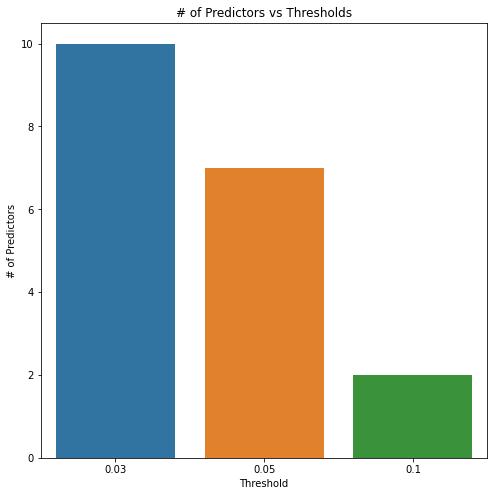

In [173]:
#graph the number of predictors by the thresholds to investigate the relationship
# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 8), nrows=1, ncols=1)

# Create list of titles and predictions to use in for loop
subset_preds = [x_0.shape[1], x_1.shape[1], x_2.shape[1]]
thresholds = ['0.03', '0.05', '0.1']

# Plot graph
ax.set_title('# of Predictors vs Thresholds')
ax.set_ylabel('# of Predictors')
ax.set_xlabel('Threshold')
sns.barplot(x=thresholds, y=subset_preds)
plt.show()

As we increase the threshold, the number of predictors decrease

OLS fit summary for a threshold of 0.03

In [174]:
# New OLS formula?
formula_str = y_shortfall+' ~ '+' + '.join(x_new.columns)
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ Bilbao_weather_id + Madrid_pressure + Valencia_humidity + Seville_pressure_slice + Seville_clouds_all + Barcelona_wind_deg + Bilbao_wind_deg + Bilbao_clouds_all + Seville_humidity + Valencia_wind_deg_slice


In [175]:
# Fit the model using the model dataframe
model = ols(formula=formula_str, data=df)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     82.87
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          1.03e-163
Time:                        15:37:09   Log-Likelihood:                -87048.
No. Observations:                8763   AIC:                         1.741e+05
Df Residuals:                    8752   BIC:                         1.742e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

OLS fit summary for a threshold of 0.5

In [176]:
#select new columns that made the threshhold cut 0.5
x_new_1 = x_normalize[x_normalize.columns[selector_1.get_support(indices=True)]]

# Save variable names for later
x_var_names_1 = x_new_1.columns

# View first few entries
x_new_1.head()

,Seville_pressure_slice,Seville_clouds_all,Barcelona_wind_deg,Bilbao_wind_deg,Bilbao_clouds_all,Seville_humidity,Valencia_wind_deg_slice
0,1.0,0.0,0.118519,0.621521,0.00,0.720000,0.444444
1,1.0,0.0,0.386111,0.615028,0.00,0.763636,1.000000
2,1.0,0.0,0.905556,0.596475,0.00,0.687273,0.888889
3,1.0,0.0,0.758333,0.555659,0.00,0.621818,0.777778
4,1.0,0.0,0.722222,0.514842,0.02,0.552727,0.666667


In [177]:
# New OLS formula?
formula_str = y_shortfall+' ~ '+' + '.join(x_new_1.columns)
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ Seville_pressure_slice + Seville_clouds_all + Barcelona_wind_deg + Bilbao_wind_deg + Bilbao_clouds_all + Seville_humidity + Valencia_wind_deg_slice


In [178]:
# Fit the model using the model dataframe
model = ols(formula=formula_str, data=df)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     105.4
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          1.09e-148
Time:                        15:37:36   Log-Likelihood:                -87089.
No. Observations:                8763   AIC:                         1.742e+05
Df Residuals:                    8755   BIC:                         1.743e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

OLS fit summary for a threshold of 0.1

In [180]:
#select new columns that made the threshhold cut 0.1
x_new_2 = x_normalize[x_normalize.columns[selector_2.get_support(indices=True)]]

# Save variable names for later
x_var_names_2 = x_new_2.columns

# View first few entries
x_new_1.head()

,Seville_pressure_slice,Seville_clouds_all,Barcelona_wind_deg,Bilbao_wind_deg,Bilbao_clouds_all,Seville_humidity,Valencia_wind_deg_slice
0,1.0,0.0,0.118519,0.621521,0.00,0.720000,0.444444
1,1.0,0.0,0.386111,0.615028,0.00,0.763636,1.000000
2,1.0,0.0,0.905556,0.596475,0.00,0.687273,0.888889
3,1.0,0.0,0.758333,0.555659,0.00,0.621818,0.777778
4,1.0,0.0,0.722222,0.514842,0.02,0.552727,0.666667


In [181]:
# New OLS formula?
formula_str = y_shortfall+' ~ '+' + '.join(x_new_2.columns)
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ Bilbao_clouds_all + Valencia_wind_deg_slice


In [182]:
# Fit the model using the model dataframe
model = ols(formula=formula_str, data=df)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     208.0
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           5.60e-89
Time:                        15:37:49   Log-Likelihood:                -87241.
No. Observations:                8763   AIC:                         1.745e+05
Df Residuals:                    8760   BIC:                         1.745e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

The condition number has not been indicated as large but we are down to two features only. This could be too low.

In [ ]:
''''''# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

MULTIPLE LINEAR REGRESSION MODEL

CHECK FOR LINEARITY

IndexError: index 10 is out of bounds for axis 0 with size 10

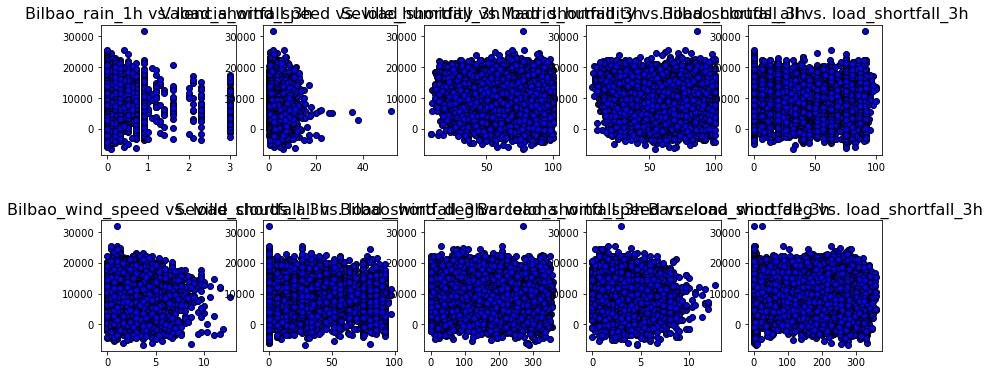

In [220]:
fig, axs = plt.subplots(2,5, figsize=(14,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. load_shortfall_3h".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['load_shortfall_3h'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [206]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

In [207]:
# create targets and features dataset

In [214]:
# Training and testing data for variance threshold model (threshold = 0.1)
x_var_train = x_train[x_var_names_1]
x_var_test = x_test[x_var_names_1]

In [215]:
# Training and testing data for correlation threshold model
x_corr_train = x_train[X_corr_names]
x_corr_test = x_test[X_corr_names]

In [216]:
#Fit model
lm = LinearRegression()
lm_corr = LinearRegression()
lm_var = LinearRegression()

In [217]:
lm.fit(x_train, y_train);
lm_corr.fit(x_corr_train,y_train);
lm_var.fit(x_var_train,y_train);

Asses model accuracy

In [218]:
from sklearn.metrics import mean_squared_error, r2_score

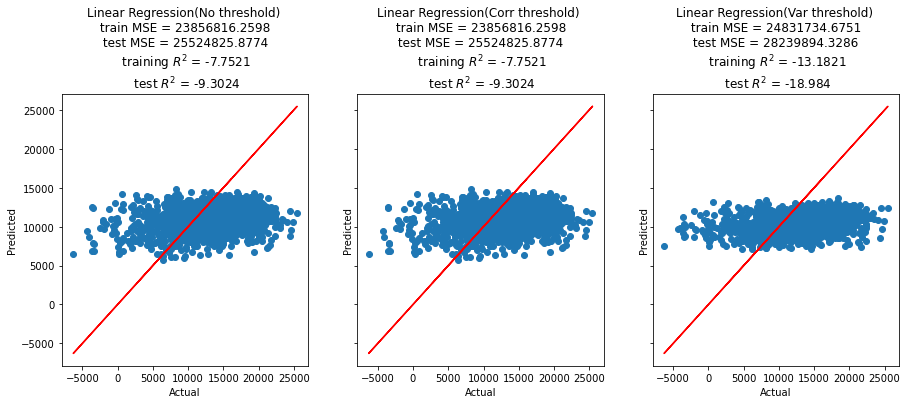

In [219]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lm.predict(x_train),
              lm_corr.predict(x_corr_train),
              lm_var.predict(x_var_train)]
test_pred = [lm.predict(x_test),
             lm_corr.predict(x_corr_test),
             lm_var.predict(x_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold - linear regression with all predictive variables
# Corr threshold - linear regression with correlation thresholded predictive variables
# Var threshold - linear regression with variance thresholded predictive variables


# Loop through all axes to plot each model's results
for i in range(3):
    test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Linear Regression({title[i]}) \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])
    
plt.show()

In [ ]:
MULTIPLE LINEAR REGRESSION MODEL

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic